We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please go to the Unix shell and type:

`sudo pip install -U pandas`

It will take a few minutes to get everything installed.

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
plt.rcParams['figure.figsize'] = (15, 5)

Let's take a look at the restaurant inspections file (at /home/ubuntu/data/restaurants.csv), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [4]:
# !curl 'https://dl.dropboxusercontent.com/u/16006464/DwD_Winter2015/restaurant.zip' -o /home/ubuntu/data/restaurant.zip

In [5]:
# !unzip /home/ubuntu/data/restaurant.zip -d /home/ubuntu/data/

In [6]:
!head -5 /home/ubuntu/data/restaurant.csv

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
30075445,MORRIS PARK BAKE SHOP,BRONX,1007      ,MORRIS PARK AVE                                   ,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2,A,03/03/2014,01/14/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007      ,MORRIS PARK AVE                                   ,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of this inspection.,,,Not Applicable,,,,01/14/2015,Trans Fat / Second Compliance Inspection
3007544

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [7]:
import pandas as pd
restaurants = pd.read_csv("/home/ubuntu/data/restaurant.csv", 
                          dtype=unicode, encoding="utf-8")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [ ]:
restaurants.head(25)

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [9]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,515589,515428,515589,514902,515589,515587,515500,515589,515589,514812,504695,504676,515589,481977,228633,227141,515589,514813
unique,25326,20590,6,10307,4868,212,24208,84,1330,5,96,101,3,121,7,1208,1,35
top,40699772,SUBWAY,MANHATTAN,0,BROADWAY,10003,7186566210,American,12/17/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,06/26/2014,01/14/2015,Cycle Inspection / Initial Inspection
freq,116,4861,211251,2237,12359,14790,313,124379,1053,482524,65550,65550,283205,38617,157683,612,515589,281832


We can also check the data types for each column

In [10]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [11]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [12]:
restaurants[["SCORE"]].describe()

,SCORE
count,481977.000000
mean,21.533478
std,14.564458
min,-1.000000
25%,12.000000
50%,18.000000
75%,27.000000
max,156.000000


In [13]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")

In [14]:
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")

In [15]:
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [16]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,515589,227141,515589
unique,1330,1208,1
top,2014-12-17 00:00:00,2014-06-26 00:00:00,2015-01-14 00:00:00
freq,1053,612,515589
first,1900-01-01 00:00:00,2010-08-26 00:00:00,2015-01-14 00:00:00
last,2015-01-12 00:00:00,2015-01-12 00:00:00,2015-01-14 00:00:00


In [17]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [18]:
restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,515589,515428,515589,514902,515589,515587,515500,515589,515589,514812,504695,504676,515589,481977.000000,219494,227141,515589,514813
unique,25326,20590,6,10307,4868,212,24208,84,1330,5,96,101,3,NaN,3,1208,1,35
top,40699772,SUBWAY,MANHATTAN,0,BROADWAY,10003,7186566210,American,2014-12-17 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2014-06-26 00:00:00,2015-01-14 00:00:00,Cycle Inspection / Initial Inspection
freq,116,4861,211251,2237,12359,14790,313,124379,1053,482524,65550,65550,283205,NaN,157683,612,515589,281832
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-26 00:00:00,2015-01-14 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-12 00:00:00,2015-01-14 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.533478,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.564458,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [19]:
restaurants["VIOLATION CODE"].head(5)

0    10F
1    NaN
2    04L
3    04N
4    04C
Name: VIOLATION CODE, dtype: category
Categories (96, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 99B]

In [20]:
restaurants[["GRADE DATE","VIOLATION CODE", "DBA"]].head(25)

,GRADE DATE,VIOLATION CODE,DBA
0,2014-03-03,10F,MORRIS PARK BAKE SHOP
1,NaT,NaN,MORRIS PARK BAKE SHOP
2,2013-09-11,04L,MORRIS PARK BAKE SHOP
3,2013-09-11,04N,MORRIS PARK BAKE SHOP
4,NaT,04C,MORRIS PARK BAKE SHOP
5,NaT,04L,MORRIS PARK BAKE SHOP
6,NaT,06A,MORRIS PARK BAKE SHOP
7,NaT,06C,MORRIS PARK BAKE SHOP
8,NaT,08A,MORRIS PARK BAKE SHOP
9,NaT,10F,MORRIS PARK BAKE SHOP


We can also get quick statistics about the common values that appear in each column:

In [21]:
restaurants["DBA"].value_counts()

SUBWAY                                               4861
MCDONALD'S                                           3916
DUNKIN' DONUTS                                       2773
STARBUCKS COFFEE                                     1982
DUNKIN DONUTS                                        1847
CROWN FRIED CHICKEN                                  1494
KENNEDY FRIED CHICKEN                                1492
BURGER KING                                          1456
DOMINO'S PIZZA                                       1322
DUNKIN' DONUTS, BASKIN ROBBINS                       1011
POPEYES CHICKEN & BISCUITS                            821
CHIPOTLE MEXICAN GRILL                                742
GOLDEN KRUST CARIBBEAN BAKERY & GRILL                 707
PAPA JOHN'S                                           600
IHOP                                                  550
CARVEL ICE CREAM                                      535
AU BON PAIN                                           526
WENDY'S       

In [22]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            124379
Chinese                                                              58935
Italian                                                              25607
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     25147
Pizza                                                                24589
Japanese                                                             18460
Mexican                                                              18420
Caribbean                                                            15977
Bakery                                                               15901
Café/Coffee/Tea                                                      15330
Spanish                                                              13398
Pizza/Italian                                                        10799
Delicatessen                                                          9104
Indian                   

In [23]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    65550
08A    49095
02G    43250
04L    36940
06D    30509
10B    29155
06C    25009
02B    23909
04N    22003
04H    15075
dtype: int64

In [24]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    65550
08A    49095
02G    43250
04L    36940
06D    30509
10B    29155
06C    25009
02B    23909
04N    22003
04H    15075
dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

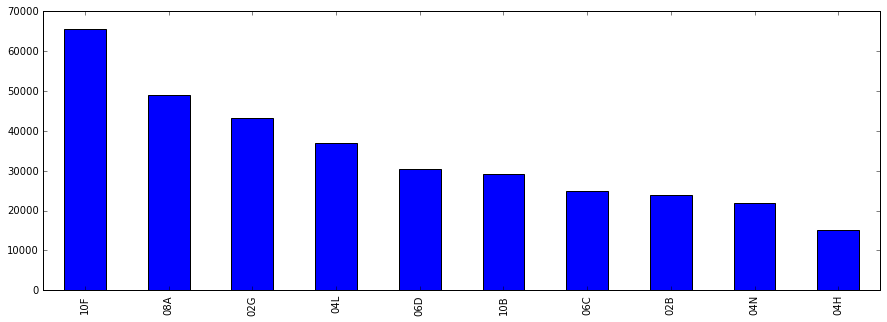

In [25]:
violation_counts[:10].plot(kind='bar')

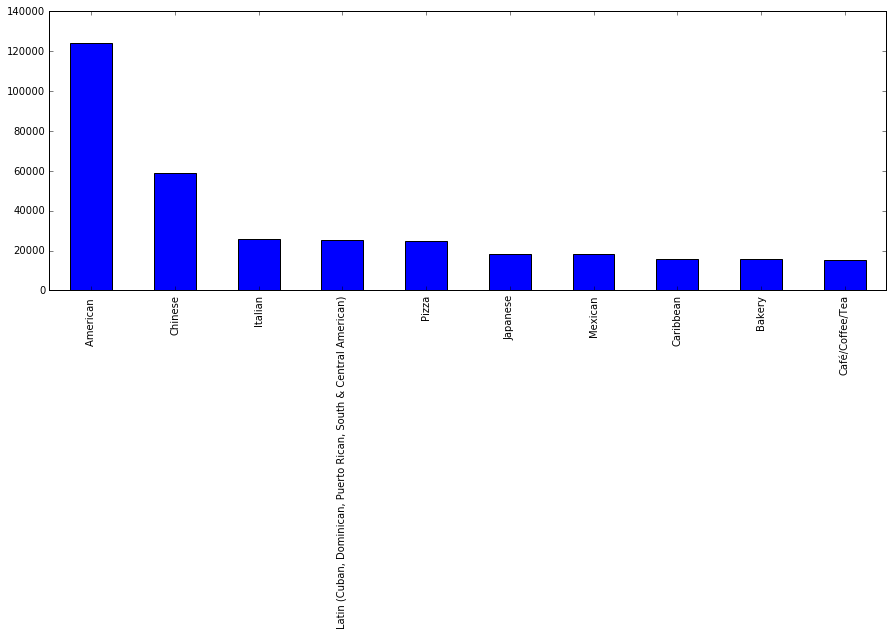

In [26]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [27]:
def capitalize(x):
    return x[0].upper() + x[1:].lower()

example = map(capitalize, ["panos", "christopher", "caterina", "lucy"])
example

['Panos', 'Christopher', 'Caterina', 'Lucy']

In [28]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
example

[10, 12, 13, 15]

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new columns that are the result of operations on the columns of the dataframe

For example, suppose that we want to format the phone column. We can write a function that takes as input a phone and formats it as we want. Then we apply the function using the map command as follows:

In [29]:
restaurants['PHONE']

0         7188924968
1         7188924968
2         7188924968
3         7188924968
4         7188924968
5         7188924968
6         7188924968
7         7188924968
8         7188924968
9         7188924968
10        7188924968
11        7188924968
12        7188924968
13        7188924968
14        7188924968
15        7188924968
16        7188924968
17        7188924968
18        7188924968
19        7188924968
20        7188924968
21        7188924968
22        7188924968
23        7188924968
24        7188924968
25        7188924968
26        7188924968
27        7188924968
28        7188924968
29        7188924968
             ...    
515559    6465933624
515560    9175620005
515561    6465594644
515562    9145228943
515563    2027142516
515564    6508235565
515565    7187429884
515566    6466449740
515567    7185731111
515568    2122697722
515569    7186519110
515570    9172925286
515571    7185223828
515572    9176227242
515573    9175888829
515574    9175620005
515575    917

In [30]:
import re
def formatPhone(phoneString):
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        area_code = match.group(1)
        first_three = match.group(2)
        last_four = match.group(3)
        formatted = "(" + area_code + ") " + first_three + "-" + last_four
        return formatted
    else:
        return None

In [31]:
print formatPhone("2129980803")

(212) 998-0803


In [32]:
restaurants['FormattedPhone'] = map(formatPhone, restaurants['PHONE'])

In [33]:
restaurants[['PHONE', 'FormattedPhone']]

,PHONE,FormattedPhone
0,7188924968,(718) 892-4968
1,7188924968,(718) 892-4968
2,7188924968,(718) 892-4968
3,7188924968,(718) 892-4968
4,7188924968,(718) 892-4968
5,7188924968,(718) 892-4968
6,7188924968,(718) 892-4968
7,7188924968,(718) 892-4968
8,7188924968,(718) 892-4968
9,7188924968,(718) 892-4968


In [34]:
def printAddress(boro, building, street, zipcode, phone):
    if building == None:
        building = ""
    if street == None:
        street = ""
    if boro == None:
        boro = ""
    if zipcode == None:
        zipcode = ""
    if phone == None:
        phone = ""
    
    result = str(building) + " " + street + " " + \
            boro + ", " + unicode(zipcode) +  " Phone: " + unicode(formatPhone(phone))       
    return result

print printAddress("Manhattan", "44", "West 4th", "10012", "2129980803")

restaurants["FormattedAddress"] = map(printAddress, 
                                     restaurants["BORO"],
                                     restaurants["BUILDING"],
                                     restaurants["STREET"],
                                     restaurants["ZIPCODE"],
                                     restaurants["PHONE"])

44 West 4th Manhattan, 10012 Phone: (212) 998-0803


In [35]:
restaurants[["FormattedAddress", "STREET", "BUILDING", "BORO"]]


,FormattedAddress,STREET,BUILDING,BORO
0,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
1,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
2,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
3,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
4,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
5,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
6,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
7,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
8,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX
9,1007 MORRIS PARK AVE ...,MORRIS PARK AVE ...,1007,BRONX


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [36]:
# Create the condition
is_08A = (restaurants["VIOLATION CODE"] == "08A")
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called inspections08A
inspections08A = restaurants[is_08A]
# List the most frequent DBA values in the inspections08A dataframe
inspections08A["DBA"].value_counts()[:10]

MCDONALD'S                    453
SUBWAY                        409
DUNKIN' DONUTS                210
CROWN FRIED CHICKEN           173
STARBUCKS COFFEE              170
DOMINO'S PIZZA                161
BURGER KING                   160
KENNEDY FRIED CHICKEN         160
DUNKIN DONUTS                 140
POPEYES CHICKEN & BISCUITS    103
Name: DBA, dtype: int64

And we can use more complex conditions:

In [37]:
is_08A_manhattan = (restaurants["VIOLATION CODE"] == "08A") \
                    & (restaurants["BORO"] == "MANHATTAN")
is_08A_manhattan

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
515559    False
515560    False
515561    False
515562    False
515563    False
515564    False
515565    False
515566    False
515567    False
515568    False
515569    False
515570    False
515571    False
515572    False
515573    False
515574    False
515575    False
515576    False
515577    False
515578    False
515579    False
515580    False
515581    False
515582    False
515583    False
515584    False
515585    False
515586    False
515587    False
515588    False
dtype: bool

In [38]:
inspections08A_in_manhattan = restaurants[is_08A_manhattan]
inspections08A_in_manhattan

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
60,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET ...,10019,2122452912,Irish,2011-12-15,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,21,NaN,NaT,2015-01-14,Cycle Inspection / Initial Inspection,(212) 245-2912,351 WEST 57 STREET ...
373,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,2014-09-02,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12,A,2014-09-02,2015-01-14,Cycle Inspection / Re-inspection,(212) 737-2140,"522 EAST 74 STREET MANHATTAN, 10021 Phone: (..."
378,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,2014-08-21,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,57,NaN,NaT,2015-01-14,Cycle Inspection / Initial Inspection,(212) 737-2140,"522 EAST 74 STREET MANHATTAN, 10021 Phone: (..."
384,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,2013-12-19,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,16,B,2013-12-19,2015-01-14,Cycle Inspection / Re-inspection,(212) 737-2140,"522 EAST 74 STREET MANHATTAN, 10021 Phone: (..."
397,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,2012-12-07,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13,A,2012-12-07,2015-01-14,Cycle Inspection / Re-inspection,(212) 737-2140,"522 EAST 74 STREET MANHATTAN, 10021 Phone: (..."
402,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,2012-10-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,46,NaN,NaT,2015-01-14,Cycle Inspection / Initial Inspection,(212) 737-2140,"522 EAST 74 STREET MANHATTAN, 10021 Phone: (..."
441,40361708,BULLY'S DELI,MANHATTAN,759,BROADWAY ...,10003,2122549755,Delicatessen,2015-01-06,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,25,NaN,NaT,2015-01-14,Cycle Inspection / Initial Inspection,(212) 254-9755,759 BROADWAY ...
468,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE ...,10024,2127210045,Chicken,2014-09-15,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10,A,2014-09-15,2015-01-14,Cycle Inspection / Initial Inspection,(212) 721-0045,502 AMSTERDAM AVENUE ...
471,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE ...,10024,2127210045,Chicken,2014-03-04,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13,A,2014-03-04,2015-01-14,Cycle Inspection / Re-inspection,(212) 721-0045,502 AMSTERDAM AVENUE ...
475,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE ...,10024,2127210045,Chicken,2014-02-03,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12,NaN,NaT,2015-01-14,Cycle Inspection / Initial Inspection,(212) 721-0045,502 AMSTERDAM AVENUE ...


In [39]:
inspections08A_in_manhattan["DBA"].value_counts()[:10]

SUBWAY                            158
STARBUCKS COFFEE                  139
MCDONALD'S                        131
DOMINO'S PIZZA                     62
DUNKIN' DONUTS                     56
DUNKIN DONUTS                      44
KENNEDY FRIED CHICKEN              40
POPEYES CHICKEN & BISCUITS         35
DUNKIN' DONUTS, BASKIN ROBBINS     30
CHIPOTLE MEXICAN GRILL             30
Name: DBA, dtype: int64

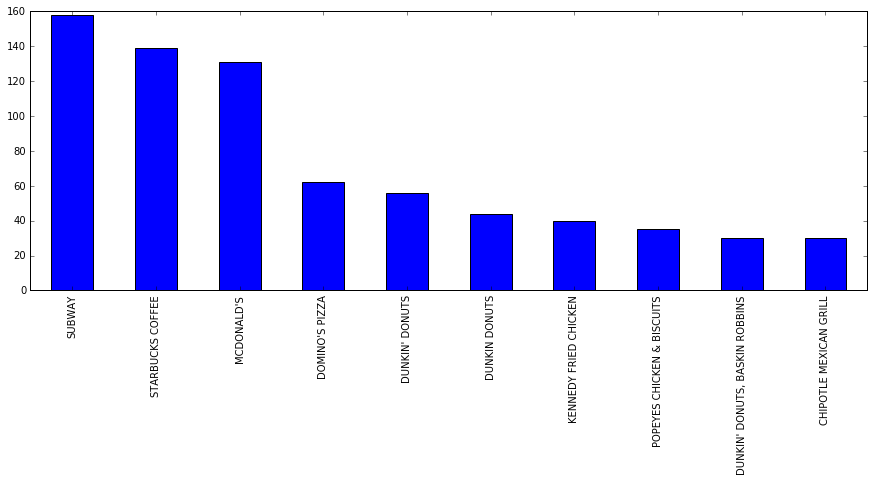

In [40]:
inspections08A_in_manhattan["DBA"].value_counts()[:10].plot(kind='bar')

In [41]:
restaurants[["VIOLATION CODE", "VIOLATION DESCRIPTION"]]

,VIOLATION CODE,VIOLATION DESCRIPTION
0,10F,Non-food contact surface improperly constructe...
1,NaN,NaN
2,04L,Evidence of mice or live mice present in facil...
3,04N,Filth flies or food/refuse/sewage-associated (...
4,04C,Food worker does not use proper utensil to eli...
5,04L,Evidence of mice or live mice present in facil...
6,06A,Personal cleanliness inadequate. Outer garment...
7,06C,Food not protected from potential source of co...
8,08A,Facility not vermin proof. Harborage or condit...
9,10F,Non-food contact surface improperly constructe...


### Plotting

In [42]:
# We need to convert the "SCORE" column to a numeric data type (just in case the related part was not executed above)
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

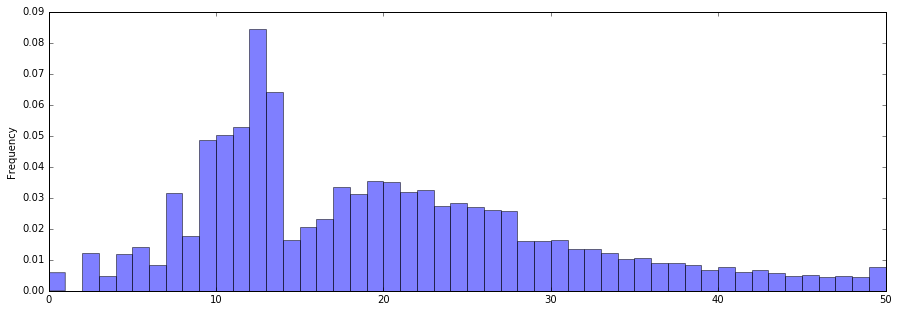

In [43]:
# We can plot a histogram of the scores using the plot(kind='hist') command
restaurants["SCORE"].plot(kind='hist', bins=50, alpha=0.5, range=(0,50), color='Blue', normed=True)

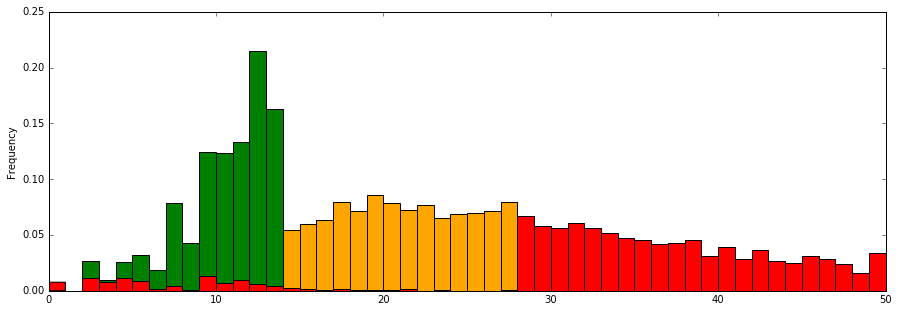

In [44]:
# We can also select specific rows to plot (e.g., in this case based on grade)
# Jupyter is smart enough to combine these three plots in one 
# (sometimes it is not smart, below we show how to make our desire to combine plots explicit)
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', bins=50, range=(0,50), color='Green', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', bins=50, range=(0,50), color='Orange', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', bins=50, range=(0,50), color='Red', normed=True)

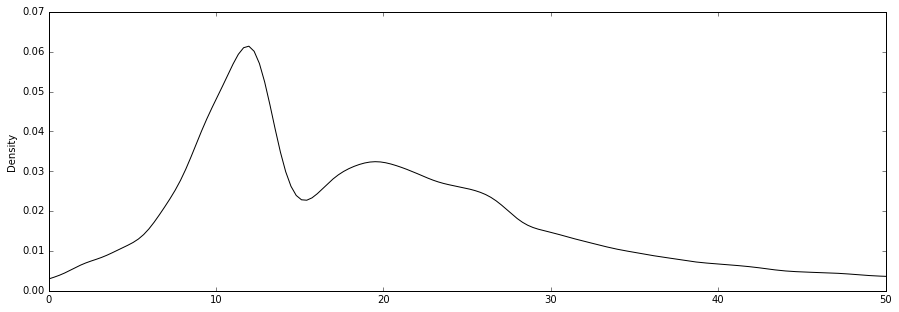

In [45]:
# This plots the desnity of a numeric attribute
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))

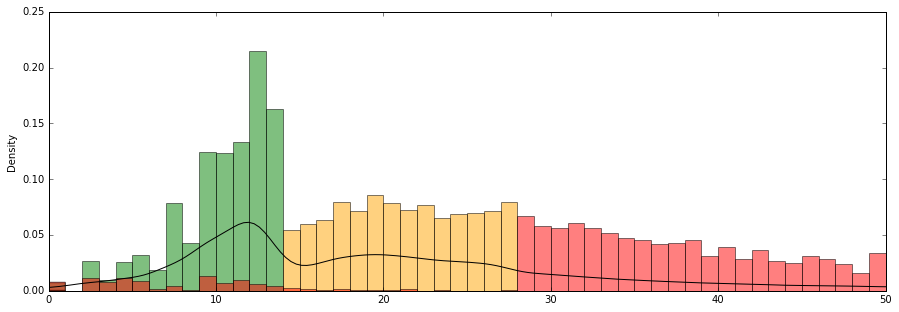

In [46]:
ax1 = restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Green', normed=True)
ax2 = restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Orange', normed=True, ax=ax1)
ax3 = restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Red', normed=True, ax=ax2)
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50), ax=ax3)

## Reading Excel files

Pandas make it trivially easy to read the contents of Excel files. For example, I stored the restaurant inspection dataset as an excel file. Let's grab it and get it stored locally:

In [49]:
!curl -L -s "https://dl.dropboxusercontent.com/u/16006464/DwD_Fall2014/Restaurants.xlsx" -o Restaurants.xlsx

To read the Excel file, pandas uses the xlrd package. It is already installed in your machine, but if not, then type this in the shell:

`sudo pip install xlrd`

In [50]:
import pandas as pd
restaurantsExcelFile = pd.ExcelFile("Restaurants.xlsx");

Read the worksheet named "WebExtract"

In [51]:
tableWebExtract = restaurantsExcelFile.parse(sheetname="WebExtract");

In [52]:
tableViolationCodes = restaurantsExcelFile.parse(sheetname='Violation');

In [53]:
tableWebExtract

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINECODE,INSPDATE,ACTION,VIOLCODE,SCORE,CURRENTGRADE,GRADEDATE,RECORDDATE
0,30191841,DJ REYNOLDS PUB AND RESTAURANT,1,351,WEST 57 STREET,10019,2122452912,47,2014-09-06,D,10F,2,A,2014-09-06,2014-09-11 06:01:26.563
1,40356068,TOV KOSHER KITCHEN,4,97-22,63 ROAD,11374,7188967788,50,2013-01-17,D,02B,13,Z,2013-01-17,2014-09-11 06:01:26.563
2,40356483,WILKEN'S FINE FOOD,3,7114,AVENUE U,11234,7184443838,27,2014-05-29,D,04M,10,A,2014-05-29,2014-09-11 06:01:26.563
3,40356731,TASTE THE TROPICS ICE CREAM,3,1839,NOSTRAND AVENUE ...,11226,7188560821,43,2014-07-14,D,10F,12,A,2014-07-14,2014-09-11 06:01:26.563
4,30112340,WENDY'S,3,469,FLATBUSH AVENUE,11225,7182875005,39,2014-07-01,F,04J,23,B,2014-07-01,2014-09-11 06:01:26.563
5,30075445,MORRIS PARK BAKE SHOP,2,1007,MORRIS PARK AVE ...,10462,7188924968,8,2014-03-03,D,10F,2,A,2014-03-03,2014-09-11 06:01:26.563
6,30112340,WENDY'S,3,469,FLATBUSH AVENUE,11225,7182875005,39,2014-07-01,F,06A,23,B,2014-07-01,2014-09-11 06:01:26.563
7,40358429,MAY MAY KITCHEN,3,1269,SUTTER AVENUE,11208,7182354485,20,2013-08-28,D,02B,7,A,2013-08-28,2014-09-11 06:01:26.563
8,40360045,SEUDA FOODS,3,705,KINGS HIGHWAY ...,11223,7183751500,50,2013-10-10,D,04L,13,A,2013-10-10,2014-09-11 06:01:26.563
9,40356151,BRUNOS ON THE BOULEVARD,4,8825,ASTORIA BOULEVARD ...,11369,7183350505,3,2014-05-02,F,06D,10,A,2014-05-02,2014-09-11 06:01:26.563


In [54]:
tableViolationCodes

,STARTDATE,ENDDATE,CRITICALFLAG,VIOLATIONCODE,VIOLATIONDESC
0,1901-01-01,2003-03-23,Y,01A,Current valid <a onmouseover=ShowContent('P...
1,2003-03-24,2005-02-17,Y,01A,Current valid <a onmouseover=ShowContent('P2'
2,2005-02-18,2007-06-30,Y,01A,Current valid <a onmouseover=ShowContent('P2'
3,2007-07-01,2008-06-30,Y,01A,"Current valid permit, registration or other au..."
4,2008-07-01,2009-08-01,Y,01A,"Current valid permit, registration or other au..."
5,1901-01-01,2003-03-23,Y,01B,"Current valid permit, registration or other au..."
6,2003-03-24,2005-02-17,Y,01B,"Document issued by the Board, Commissioner or ..."
7,2005-02-18,2007-06-30,Y,01B,"Document issued by the Board, Commissioner or ..."
8,2007-07-01,2008-06-30,Y,01B,"Document issued by the Board, Commissioner or ..."
9,2008-07-01,2009-08-01,Y,01B,"Document issued by the Board, Commissioner or ..."


### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [57]:
# !sudo -H pip install -U pandasql

In [58]:
from pandasql import sqldf

In [59]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [60]:
rest = restaurants[["DBA", "BORO", "VIOLATION", "SCORE"]]

In [61]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  rest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = sqldf(q, globals())

In [62]:
df

,BORO,VIOLATION,CNT
0,MANHATTAN,10F,26854
1,MANHATTAN,02G,19721
2,MANHATTAN,08A,19124
3,QUEENS,10F,15200
4,BROOKLYN,10F,14925
5,MANHATTAN,04L,14049
6,MANHATTAN,06D,13604
7,MANHATTAN,10B,12773
8,BROOKLYN,08A,12424
9,QUEENS,08A,11558


In [63]:
q  = """
SELECT SCORE, COUNT(*) AS CNT 
FROM
  rest
GROUP BY SCORE
ORDER BY SCORE
"""

df = sqldf(q, globals())

In [64]:
df

,SCORE,CNT
0,NaN,33612
1,-1,193
2,0,2683
3,2,5619
4,3,2123
5,4,5397
6,5,6429
7,6,3770
8,7,14483
9,8,8083


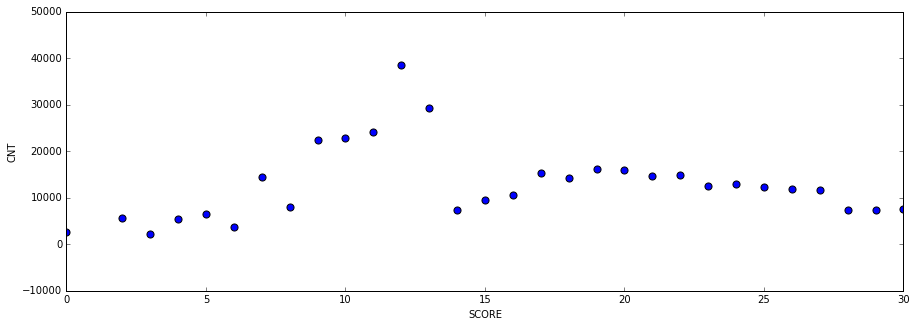

In [65]:
df.plot(kind='scatter', s=50, x="SCORE", y="CNT", xlim=(0,30))